In [2]:
import gedsk

In [3]:
filename = "geqdsks\ITER_10MA.geqdsk"
data = gedsk.read_gedsk(filename)
psi = gedsk.get_psi(data)

In [4]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
spline = gedsk.get_spline_for_psi(psi, x, y)
#all_critical_ponts = gedsk.find_all_critical_points(spline, bounds, nx=50, ny=50)

In [5]:
root = gedsk.find_critical_point_using_root(spline, 6, 0, method='hybr')

In [6]:
root

 message: The solution converged.
 success: True
  status: 1
     fun: [-4.228e-11  9.030e-11]
       x: [ 6.560e+00  5.734e-01]
    nfev: 13
    fjac: [[-8.847e-01  4.661e-01]
           [-4.661e-01 -8.847e-01]]
       r: [ 4.214e+00 -6.954e-02  6.133e-01]
     qtf: [-1.468e-09  1.201e-09]

In [7]:
all_critical_points = gedsk.find_all_critical_points_using_root(spline, bounds,nx=20, ny=20, method='hybr')
all_critical_points

{(4.445006643830521, 4.78999910647696),
 (5.11698486197394, -3.4239199463219987),
 (6.559890449106357, 0.5734331181702937)}

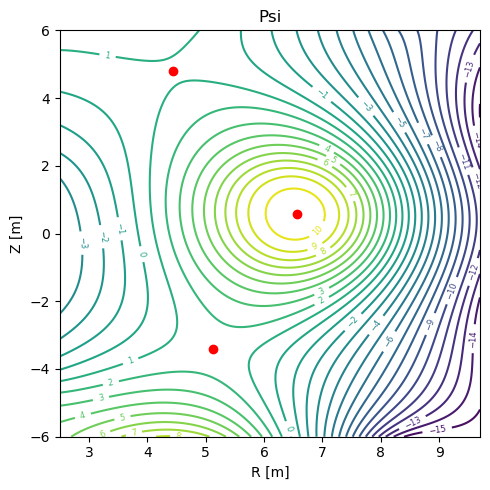

In [8]:
xx, yy = gedsk.get_meshgrid_for_psi(data)
gedsk.plotPoints_on_psi_contour(psi, xx, yy, points=all_critical_points)

In [9]:
# find type of critical point for each point
sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds)
sorted_points

{'saddle': [(4.445006643830521, 4.78999910647696),
  (5.11698486197394, -3.4239199463219987)],
 'maximum': [(6.559890449106357, 0.5734331181702937)]}

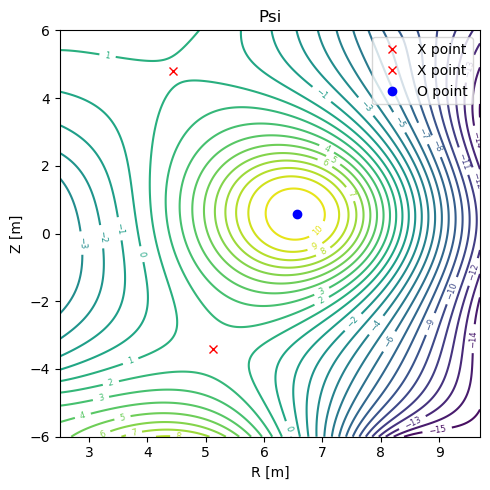

In [10]:
gedsk.plot_sorted_points_with_contour(psi, xx, yy, sorted_points)

In [11]:
# get the value of psi at one x point
x_point = sorted_points['saddle'][0]
x_value = spline(x_point[0], x_point[1])
x_value

array([[0.94253004]])

In [12]:
# get the another x point
x_point1 = sorted_points['saddle'][1]
x_value1 = spline(x_point1[0], x_point1[1])
x_value1

array([[1.50227085]])

In [13]:
import matplotlib.pyplot as plt

C:\Users\fuadh\AppData\Local\Temp\ipykernel_17208\373044969.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  contour = ax.contour(x, y, spline(x, y).T, levels=[x_value[0][0], x_value1[0][0], 3, 5], colors=['red','blue'], label='Separatrix Curves')


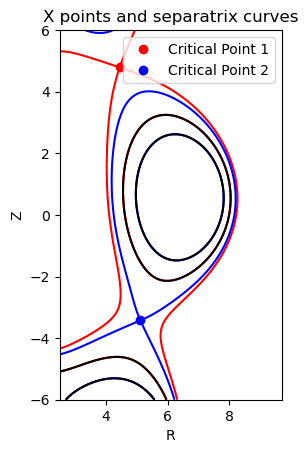

In [28]:
# plot the spline as a contour
fig = plt.figure()
ax = fig.add_subplot(111)
# plot contour using the spline not the psi
contour = ax.contour(x, y, spline(x, y).T, levels=[x_value[0][0], x_value1[0][0], 3, 5], colors=['red','blue'], label='Separatrix Curves')
ax.contour(x, y, spline(x, y).T, levels=[3, 5], colors=['black']*2)
# plot the critical point x_point
ax.plot(x_point[0], x_point[1], 'o', color='red', label='Critical Point 1')
# plot the critical point x_point1
ax.plot(x_point1[0], x_point1[1], 'o', color='blue', label='Critical Point 2')
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.legend()
# make the scale equal on both axis
ax.set_aspect('equal')
ax.set_title('X points and separatrix curves')
plt.show()
